In [3]:
import matplotlib.pyplot as plt
import pandas as pd

Here i present the explorative analysis of the gender pay gap dataset from UK dated 2021 to 2022.

https://gender-pay-gap.service.gov.uk/viewing/download

In [5]:
df = pd.read_csv("UK Gender Pay Gap Data - 2021 to 2022.csv")

The data represented in quartiles and representaion of each gender in percents in each quartile.
Thats what the distribution looks like.

<BarContainer object of 8 artists>

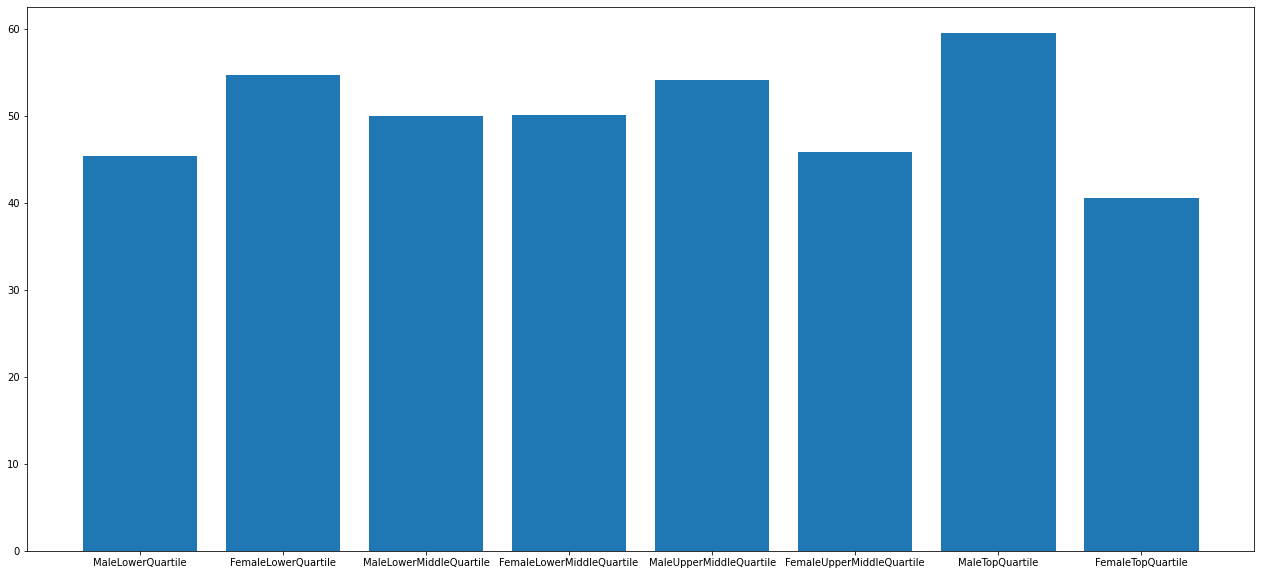

In [245]:
fig = plt.figure(figsize=(22,10), dpi = 72)
ax = fig.add_subplot()
ax.bar(df.columns[12:20], df.iloc[:,12:20].describe().loc['mean'] )

In [217]:
for i,j in enumerate( df.columns[12:20]):
    print(i,' ',j)

0   MaleLowerQuartile
1   FemaleLowerQuartile
2   MaleLowerMiddleQuartile
3   FemaleLowerMiddleQuartile
4   MaleUpperMiddleQuartile
5   FemaleUpperMiddleQuartile
6   MaleTopQuartile
7   FemaleTopQuartile


In [12]:
quartiles_whole = df.iloc[:,12:20]
quartiles_whole_female = quartiles_whole.iloc[:, [1,3,5,7]]
quartiles_whole_male = quartiles_whole.iloc[:, [0,2,4,6]]

#### In the entire data set there are:

In [71]:
print(f"{quartiles_whole_male.mean().mean().round(3)}% of men.")

52.228% of men.


In [72]:
print(f"{quartiles_whole_female.mean().mean().round(3)}% of women.")

47.772% of women.


#### And that is how women are represented in different salary tiers:

In [16]:
quartiles_whole_female.mean()

FemaleLowerQuartile          54.632763
FemaleLowerMiddleQuartile    50.070821
FemaleUpperMiddleQuartile    45.868917
FemaleTopQuartile            40.513851
dtype: float64

In [100]:
print(f"In the top paid quantile women are underrepresented by {(round((1-40.514/47.772)*100, 2))}% of their proportion in the population.")

In the top paid quantile women are underrepresented by 15.19% of their proportion in the population.


In [99]:
print(f"In the lowest paid quantile women are overrepresented by {round(((54.6327-47.772)/47.772)*100,1)}% relative to their proportion in the population.")

In the lowest paid quantile women are overrepresented by 14.4% relative to their proportion in the population.


### But lets see if it is always the case, if we can find companies where woman are overrepresented in Top paid Quartile.

In [19]:
test = df[df['MaleTopQuartile']<df['FemaleTopQuartile']].iloc[:,12:20]
print(f"\nThere are {test.shape[0]} companies like that.")
print(f"That's {round(test.shape[0]/df.shape[0]*100)}% of all the busineses in the dataset.")


There are 3661 companies like that.
That's 35% of all the busineses in the dataset.


### Lets find out what is the gender composition of that segment of the companies:

In [257]:
fem = int(test.iloc[:,[1,3,5,7]].mean().mean().round())
m = int(test.iloc[:,[0,2,4,6]].mean().mean().round())
print(f"\nIt's {fem}% women and {m}% men, working in those companies.")


It's 73% women and 27% men, working in those companies.


In [21]:
test.iloc[:,[1,3,5,7]].mean()

FemaleLowerQuartile          75.771729
FemaleLowerMiddleQuartile    74.632887
FemaleUpperMiddleQuartile    72.141601
FemaleTopQuartile            67.975608
dtype: float64

In [70]:
print(f"As you see from above the women are underrepresented \nin the Top quartile by {round(((73-68)/73)*100, 1)}% relative to 73% of them overall \nand overrepresented in the lowest paid quantile by {round((3/73.0)*100,1)}%.")

As you see from above the women are underrepresented 
in the Top quartile by 6.8% relative to 73% of them overall 
and overrepresented in the lowest paid quantile by 4.1%.


There is still a descrepancy, but it is not as severe as in the whole dataset. <strong>7 and 4 % vs 15 and 14 %</strong>. <br>I wonder though what is going on in male dominated industry segment.<br>Lets find out how many companies have males overrepresented in the <strong>Top Paid Quartile</strong>

In [79]:
test2 = df[df['MaleTopQuartile']>df['FemaleTopQuartile']].iloc[:,12:20]
print(f"\nThere are {test2.shape[0]} companies like that.")
print(f"That's {round(test2.shape[0]/df.shape[0]*100)}% of all the busineses in the dataset.")


There are 6541 companies like that.
That's 62% of all the busineses in the dataset.


#### In this segment there are:

In [82]:
fem = int(test2.iloc[:,[1,3,5,7]].mean().mean().round())
m = int(test2.iloc[:,[0,2,4,6]].mean().mean().round())
print(f"\n{fem}% women and {m}% men")


34% women and 66% men


#### That's how women are distributed amond the salaries quartiles in this segment:

In [102]:
test2.iloc[:,[1,3,5,7]].mean()

FemaleLowerQuartile          42.695200
FemaleLowerMiddleQuartile    36.203960
FemaleUpperMiddleQuartile    31.022198
FemaleTopQuartile            25.008623
dtype: float64

#### Here women are overrepresented in the lowest paid and underrepresented in the top paid quartile by

In [204]:
print(f"{round((42-34)/0.34,1)} and {round((34-25)/0.34,1)} percent accordingly.")

23.5 and 26.5 percent accordingly.


Much worse actually :(


### Below I want to check if there is a correlation between sizes of the companies and the pay gap

In [170]:
sizeToPres = df.FemaleTopQuartile.groupby(df.EmployerSize).mean()

In [225]:
sizeToPres.index = ['Less than 250', '250 to 499', '500 to 999', '1000 to 4999', '5000 to 19,999', '20,000 or more', 'Not Provided']

<BarContainer object of 7 artists>

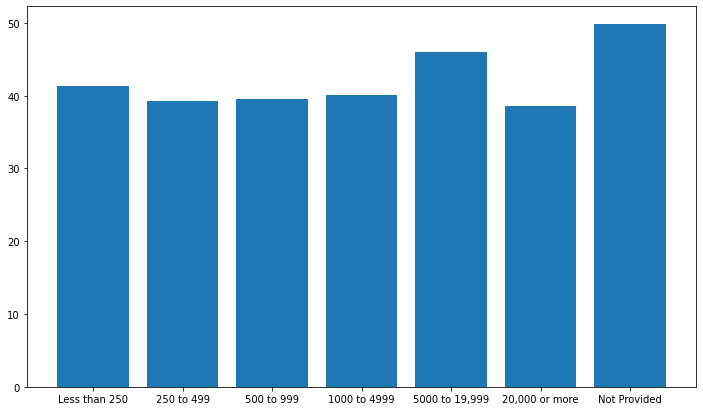

In [228]:
fig = plt.figure(figsize=(12,7), dpi = 72)
ax = fig.add_subplot()
ax.bar(sizeToPres.index, sizeToPres)

we can see that every next company size cathegory 2 or 5 times larger than previous, there is slight increase trend in disparity between <strong>250 to 499</strong> and <strong>5000to 19000</strong>  but <strong>less than 250</strong> and <strong>20000 and more</strong> break that parrern. It seems the size of the company is not a decisive factor. Only 215 companies did not provide their size.

In [240]:
df.EmployerSize[df.EmployerSize=='Not Provided'].size

215

In [248]:
over_f = quartiles_whole_female[quartiles_whole_female.mean(axis=1)<=quartiles_whole_female.FemaleTopQuartile].shape[0]
over_m = quartiles_whole_male[quartiles_whole_male.mean(axis=1)<=quartiles_whole_male.MaleTopQuartile].shape[0]

Some companies do have women overrepresented in the highest paid quartile,

In [255]:
print(f"their number is {over_f}, thats {round((over_f/df.shape[0])*100,2)}% of all the companies.")

their number is 1869, thats 17.81% of all the companies.


In [256]:
print(f"Same number for men is {over_m }, thats {round((over_m/df.shape[0])*100,2)}% of all the companies.")

Same number for men is 8472, thats 80.75% of all the companies.


The dataset does not provide any data to try to establish which factors may have contributed to the disparity in the salaries distribution and why women are so often underpaid compared to men. 